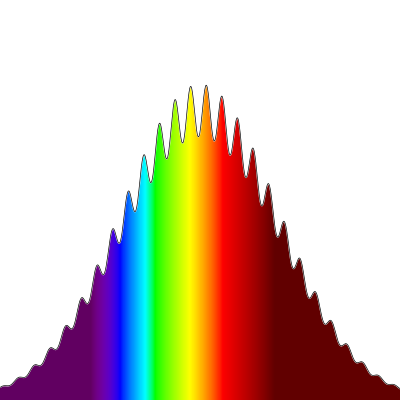

In [4]:
import numpy as np
from hipster import SpectrumPlotter, Reconstruction, AbsorptionLinePlotter
from PIL import Image

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths * 0.1) ** 2) * np.exp(-0.00002 * (wavelengths - 600) ** 2)
spectrum_plotter = SpectrumPlotter(wavelengths, figsize_in_pixel=400)
image = spectrum_plotter(spectrum)
image = Image.fromarray(image)
image

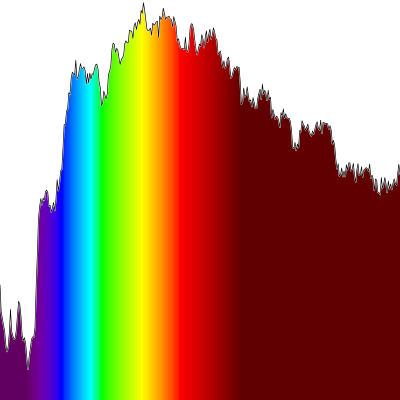

In [5]:
rg = Reconstruction("../tests/models/vae_decoder.onnx")
point = np.array([[0, 0.5, 0.5]], dtype=np.float32)
spectrum = rg(point)[0][0]
wavelengths = np.arange(336, 1023, 2)
spectrum_plotter = SpectrumPlotter(wavelengths, ylim=(0, 1), figsize_in_pixel=400)
image = spectrum_plotter(spectrum)
image = Image.fromarray(image)
image

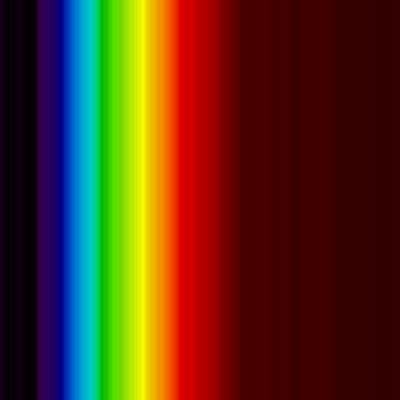

In [6]:
plotter = AbsorptionLinePlotter(wavelengths, figsize_in_pixel=400)
image = plotter(spectrum)
image = Image.fromarray(image)
image